Environment: Observing

Run script: \Users\woodml\Observing\XMM-Newton\initialize_sas.bash 

## Procedure

In this notebook I and run the intial processing scripts for the XMM-Newton data.

- Where in my system is the SAS software?
> /Users/woodml/Code/XMM_SAS
- Where in my system are the Calibration files?
> /Users/woodml/Observing/XMM-Newton/Calibration
- Where is the XMM-Newton Observation data that I want to process?
> /Users/woodml/Observing/XMM-Newton/0101440801
- Which directory am I going to use to work with SAS?
> /Users/woodml/Observing/XMM-Newton/0101440801

## Initialization

In [1]:
import sys, os
module_path = '/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python' # or the path to your source code
sys.path.insert(0, module_path)
%env SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
from extraction_fcns import extract_lc, extract_spectrum, plot_LC, plot_region, plot_spectrum, rolling_median
from pysas.wrapper import Wrapper as wrap
from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.linewidth'] = 1

env: SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735


In [2]:
wrap('sasver', []).run()


    XMM-Newton SAS - release and build information

    SAS release: xmmsas_20230412_1735-21.0.0
    Compiled on: Sun Apr 16 21:00:41 CEST 2023
    Compiled by: sasbuild@xmmm23.iuser.lan
    Platform   : macOS-12.6

    SAS-related environment variables set:

    
SAS_DIR        = /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
SAS_PATH       = /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
SAS_CCFPATH    = /Users/woodml/Observing/XMM-Newton/Calibration


<h3><tt>starsas</tt> parameters</h3>
&nbsp;
<p style="text-align: justify;">As mentioned above, <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a>, is aimed at providing these three steps just described in an easy way. To start with, we can get a list of the parameters available for this task by means of the options <tt>-h</tt> or <tt>-p</tt>.</p>

In [3]:
inargs=['-h']

In [4]:
wrap('startsas', inargs).run()


        Usage: startsas [Options] param0=value0 [param1=value1] ...

        Options:
        -a | --ccfpath <dir1>:<dir2>...   Sets SAS_CCFPATH to <dir1>:<dir2>...
        -c | --noclobber                  Set SAS_CLOBBER=0
        -d | --dialog                     Launchs task GUI
        -f | --ccffiles <f1> <f2> ...     CCF files
        -h | --help                       Shows this message, display param file contents and exits
        -i | --ccf <cif>                  Sets SAS_CCF=<cif> (ccf.cif)
        -m | --manpage                    Opens web browser with task documentation
        -o | --odf <sumfile>              Sets SAS_ODF to SAS summary file
        -p | --param                      List of all available task parameters with default values
        -t | --trace                      Trace task execution
        -V | --verbosity <level>          Sets verbosity level and sets SAS_VERBOSITY
        -v | --version                    Shows task name and version, and exits
   

/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_widths' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.width' instead.
  warnings.warn(message, FutureWarning)
/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.max_table_width' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BeautifulTable.maxwidth' instead.
  warnings.warn(message, FutureWarning)
/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.appen

<p style="text-align: justify;">Column <tt>name</tt> lists the parameter names, column <tt>mandatory</tt> shows whether the parameter is optional or mandatory, column <tt>type</tt> shows the type of the parameter (boolean, integer, real, etc), column <tt>default</tt> shows whether the parameter has a default value or not, and finally, column <tt>description</tt> provides a short description of the parameter.</p>

<h3>Executing startsas</h3>
&nbsp;

<p style="text-align: justify;">We will show three modes of execution of <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a>:</p>

<ol>
<li>Using the parameter <tt>odfid</tt></li>
<li>Using the parameters <tt>sas_ccf</tt> and <tt>sas_odf</tt></li>
<li>Using the parameter <tt>odfid</tt> with <tt>level=PPS</tt></li>
</ol>

### With parameter

<p style="text-align: justify;">The first mode is possibly the most general usage of the task, where <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a> is asked to download the ODF identified by <tt>odfid</tt>, into the <tt>Working directory</tt>, identified by <tt>workdir</tt>. Once downloaded, the task unpacks the file into a subdirectory with the name of the ODF identifier and runs immediately after, the tasks <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/cifbuild/index.html"><tt>cifbuild</tt></a> and <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/odfingest/index.html"><tt>odfingest</tt></a> (without parameters). This will provide the CIF file (<tt>ccf.cif</tt>) and the Summary file (<tt>*SUM.SAS</tt>), both in the <tt>Working directory</tt>. Besides this, the environment variables <tt>SAS_CCF</tt> and <tt>SAS_ODF</tt> are set to point to those files, respectively.</p>

<p style="text-align: justify;">Assuming that we want to work on ODF <tt>0104860501</tt>, let us define the input parameters for <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a> as,</p>
<br>
<i><u>Note:</u> <tt>work_dir</tt> should be the absolute path to the <tt>Working directory</tt> and finished with '/'.</i>

In [5]:
work_dir = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801'

In [6]:
inargs = [f'odfid=0101440801', 'level=ODF',f'workdir={work_dir}']

<p style="text-align: justify;">Now, we execute <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html"><tt>startsas</tt></a> as described earlier. Any log information produced by the SAS tasks will appear in the terminal used to <i>initialize</i> SAS and start this notebook.</p>

In [7]:
wrap('startsas', inargs).run()

startsas - WARNING - Executing /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '0101440801', 'workdir': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801', 'sasfiles': 'no', 'sas_ccf': '', 'sas_odf': '', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}




        Starting SAS session
    
        Working directory = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801
    
        
Requesting odfid  = 0101440801 to XMM-Newton Science Archive




Creating directory 0101440801 ...

Unpacking 0101440801.tar.gz ...

Unpacking 0327_0101440801.TAR ...

Setting SAS_ODF = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801

Running cifbuild...
cifbuild:- Executing (routine): cifbuild calindexset=ccf.cif ccfpath=. withccfpath=no usecanonicalname=no recurse=no fileglob=*.ccf|*.CCF fullpath=no observationdate=now withobservationdate=no analysisdate=now category=XMMCCF ignorecategory=no masterindex=no masterindexset=ccf.mif withmasterindexset=no append=no  -w 1 -V 4
cifbuild:- cifbuild (cifbuild-4.10.1)  [xmmsas_20230412_1735-21.0.0] started:  2025-02-05T16:58:44.000
cifbuild:- Will ask the analysis date to the OAL.
cifbuild:- Using the ODF 0327_0101440801 found in /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801
cifbui

<p style="text-align: justify;"><b>The process ends with both variables, <tt>SAS_CCF</tt> and <tt>SAS_ODF</tt> defined, both respectively pointing to the <tt>CIF</tt> and Summary Files.</b></p>

<p style="text-align: justify;"><b>From that point onwards we can start running specific SAS commands to obtain the observation event files.</b></p>

<p style="text-align: justify;">This process has downloaded the ODF into the <tt>Working directory</tt> as defined by the input parameter <tt>workdir</tt> and has run <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/cifbuild/index.html" target="_parent"><tt>cifbuild</tt></a> and <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/odfingest/index.html" target="_parent"><tt>odfingest</tt></a>. <tt>workdir</tt> has to be defined with an absolute path in the call to <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/startsas/index.html" target="_parent"><tt>startsas</tt></a>. In the <tt>Working directory</tt> a new directory with the identifier of the ODF will be created, and all the ODF constituents will be contained inside. The outputs of running <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/cifbuild/index.html" target="_parent"><tt>cifbuild</tt></a> and <a href="https://xmm-tools.cosmos.esa.int/external/sas/current/doc/odfingest/index.html" target="_parent"><tt>odfingest</tt></a> will be placed directly under the <tt>Working directory</tt>.</p>

<h2>How to continue from here?</h2>
&nbsp;

<p style="text-align: justify;">This depends on the type of products you have requested.</p>

<p style="text-align: justify;">If you requested the Pipeline products (<tt>level=PPS</tt>), your may begin exploring these products directly. Among them, you will find the Observation Event Files for the different instruments and a lot of information ready to be used.</p>

<p style="text-align: justify;">If you simply requested the ODF (<tt>level=ODF</tt>), the first step is to run the proper SAS tasks to get the Observation Event Files for each instrument. Then, you may have alook to other Threads to get familiar with specific processing tasks for each instrument.</p>

<p style="text-align: justify;">In the next cells we show how to run from here four typical SAS tasks, three `procs` and one `chain` to process exposures taken with the EPIC PN and MOS instruments, RGS and OM.</p>

<p style="text-align: justify;">Given that the execution of these tasks produces a lot of output, we have not run them within the notebook.</p> 

<p style="text-align: justify;">We leave this up to you!</p>

In [8]:
%env SAS_ODF = /Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_SCX00000SUM.SAS
%env SAS_CCF = /Users/woodml/Observing/XMM-Newton/0101440801/ccf.cif
work_dir = '/Users/woodml/Observing/XMM-Newton/0101440801'

env: SAS_ODF=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_SCX00000SUM.SAS
env: SAS_CCF=/Users/woodml/Observing/XMM-Newton/0101440801/ccf.cif


# Process EPIC-PN

This dataset has no image from EPIC-PN, so this step is unecessary.

# Process EPIC MOS

First, plot the global lightcurve to determine an appropriate count rate limit for the GTI

Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && (PI > 10000) ' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset='spectrum.fits' sp

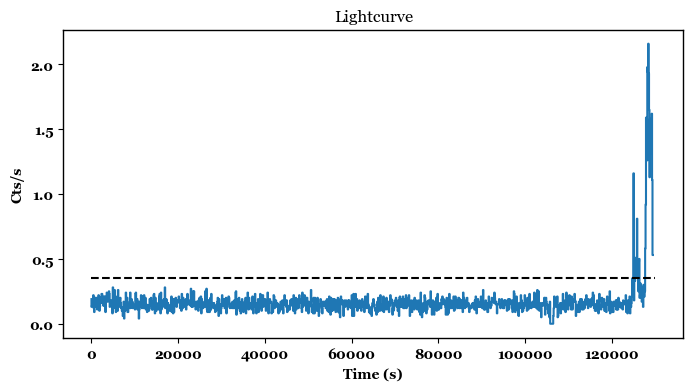

In [17]:
# Plot global LC
q_flag  = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern = 12
lc_bin  = 100
event_file = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds'
out_file = 'full_bkg.lc'

expression = f'{q_flag}&&(PATTERN<={n_pattern}) && (PI > 10000) '  # event filter expression
inargs     = [f'table={event_file}','energycolumn=PI','withrateset=yes',f'rateset={out_file}',
              f'timebinsize={lc_bin}','maketimecolumn=yes','makeratecolumn=yes',f'expression={expression}']
wrap('evselect', inargs).run()

plt.figure(figsize=(8,4))
plot_LC(plt, 'full_bkg.lc')
# plt.xlim(38000, 45000)
plt.hlines(0.35, 0, 130000, 'k','--')
plt.show()

In [14]:
# Create GTI
# SAS Command
cmd    = 'tabgtigen'  # SAS task to be executed

# Arguments of SAS Command
inargs = ['table=full_bkg.lc', 'gtiset=gti.fits', 'expression=(RATE<=0.35)']        # comma separated arguments for SAS task

print("   SAS command to be executed: "+cmd+", with arguments; ", inargs)

wrap(cmd, inargs).run()

   SAS command to be executed: tabgtigen, with arguments;  ['table=full_bkg.lc', 'gtiset=gti.fits', 'expression=(RATE<=0.35)']
Executing: 
tabgtigen table='full_bkg.lc' gtiset='gti.fits' expression='(RATE<=0.35)' timecolumn='TIME' prefraction='0.5' postfraction='0.5' mingtisize='0.0' 
tabgtigen:- Executing (routine): tabgtigen table=full_bkg.lc gtiset=gti.fits expression=(RATE<=0.35) timecolumn=TIME prefraction=0.5 postfraction=0.5 mingtisize=0  -w 1 -V 4
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-10-08T19:12:34.000
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] ended:    2024-10-08T19:12:34.000


Filename: gti.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1  STDGTI        1 BinTableHDU     30   5R x 2C   [D, D]   
['TIME', 'RAWX', 'RAWY', 'DETX', 'DETY', 'X', 'Y', 'PHA', 'PI', 'FLAG', 'PATTERN', 'CCDNR']
       TIME        RAWX RAWY  DETX  DETY  ...   PI    FLAG  PATTERN CCDNR
------------------ ---- ---- ----- ------ ... ----- ------- ------- -----
 117423318.5742515  244  371 -1246   1553 ... 13166 4194304       0     1
117423322.12387855  362    3  1362  -6550 ... 13077 4194304       0     1
117423321.62932512  361  138  1322  -3584 ...  1641       0       0     1
               ...  ...  ...   ...    ... ...   ...     ...     ...   ...
117552862.34889185  363  505 -2022 -14842 ...   906       0       0     7
117552861.83762175  525  534 -1376 -18404 ...  2906   65536       0     7
  117552862.028099  124  593   -83  -9570 ... 12902 4194304       0     7
Length = 401690 rows


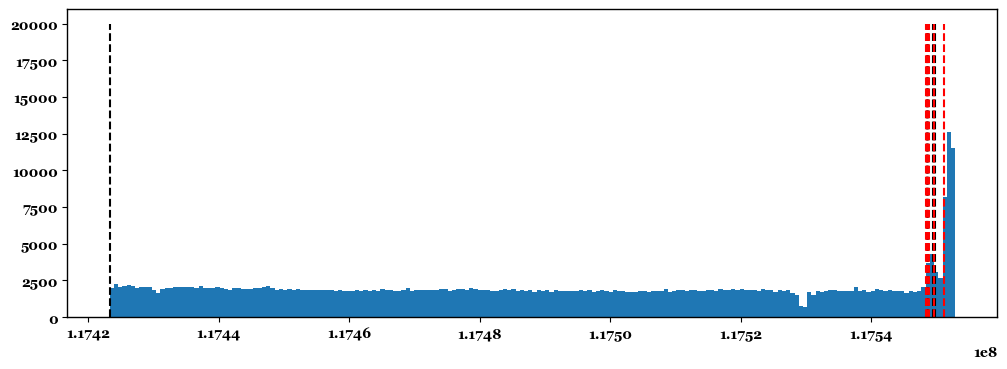

In [15]:
# Plot GTI
hdul = fits.open('gti.fits')
hdul.info()

gti = Table(hdul[1].data)
# Do these times line up with the expected times?

events = Table(fits.open(event_file)[1].data)
print(events.colnames)
print(events)

plt.figure(figsize=(12,4))
plt.hist(events['TIME'], bins=200)
plt.vlines(gti['START'], 0,20000, 'k','--')
plt.vlines(gti['STOP'], 0, 20000, 'r','--')
plt.show()

In [10]:
# SAS Command
cmd    = 'emproc'  # SAS task to be executed

# Arguments of SAS Command
inargs = []        # comma separated arguments for SAS task

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: emproc, with arguments; 



[]

In [11]:
wrap(cmd, inargs).run()      # <<<<< Execute SAS task
exists = 0 
m1evt_list = []
m2evt_list = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if (filename.find('EMOS1') != -1) and filename.endswith('ImagingEvts.ds'):
            m1evt_list.append(filename)
            exists = 1 
        if (filename.find('EMOS2') != -1) and filename.endswith('ImagingEvts.ds'):
            m2evt_list.append(filename)
            exists = 1            
if exists:    
    print(" > " + str(len(m1evt_list)) + " EPIC-MOS1 event list found. Not running emproc again.\n")
    for x in m1evt_list:
        print("    " + x + "\n")
    print(" > " + str(len(m2evt_list)) + " EPIC-MOS2 event list found. Not running emproc again.\n")
    for x in m2evt_list:
        print("    " + x + "\n")
    print("..... OK")
else:
    print("Something has gone wrong with emproc. I cant find any event list file. \n")

Executing: 
emproc selectinstruments='no' emos1='no' emos2='no' removetemporaries='yes' removeintermediategtis='yes' removeintermediateeventlists='yes' withinstexpids='no' instexpids='M1S001 M2S001' selectccds='no' ccd1='no' ccd2='no' ccd3='no' ccd4='no' ccd5='no' ccd6='no' ccd7='no' selectmodes='yes' imaging='yes' rimaging='yes' timing='yes' ctiming='no' withgtiset='no' gtiset='gti.ds' runhkgtigen='yes' runatthkgen='yes' referencepointing='median' ra='0' dec='0' posangle='0' filterevents='yes' filterexpression='(FLAG & 0x762aa000) == 0' flagfilteredevents='no' rungtimerge='no' applygti='yes' runevlistcomb='yes' searchforbadpixels='yes' badpixfindalgo='embadpixfind' searchforbadcolumns='yes' withbadpixgti='no' badpixgti='bapixgti.ds' thresholdlabel='rate' lothresh='0' hithresh='0.005' columnsearchlabel='median' locolthresh='0' hicolthresh='0.002' flickertimesteps='1' flickerksthresh='0.55' flickerchisqthresh='15' backgroundrate='-1' narrowerthanpsf='3' threshabovebackground='no' loener

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_01_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_01_EvtsForBadpixfindTemp.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_01_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=no flagbadpixels=no keepsifluor=no splitdiagonals=no randomizeposition=no setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=no settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:06.000
** emproc::emevents: warning (openEventsIn12),  the event file is empty.
** emproc::emevents: warning (UnidentifiedCameraMode), Cannot uniquely determine EMOS camera mo

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS1_S003_03_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:08.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS1_S003_03_EvtsForBadpixfindTemp.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-         1233  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=         100  w

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:-  Writing          11  rows to .//0327_0101441401_EMOS1_S003_03_Badpixels.ds:BADPIX
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:09.000
emproc:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:09.000
emproc:- Processing data set: /Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1S00340IME.FIT
emproc:- Executing (invoked): emframes auxiliaryset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1S00300AUX.FIT frameset=.//0327_0101441401_EMOS1_S003_04_FramesTem

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_04_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate

emproc::emframes:-  Area of window within field of view is   78.5678635      arcmin2
emproc::emframes:-  Fraction of window within field of view is  0.648377776
emproc::emframes:-            0  frames rejected by FLAG_HK
emproc::emframes:-  Fraction of good time :   0.93998261272107797
emproc::emframes:-  Writing extension STDGTI05
emproc::emframes:-  Create .//0327_0101441401_EMOS1_S003_05_FrmGti.ds with           1  rows
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:12.000
emproc:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:12.000
emproc:- Executing (invoked): emevents odfeventset=.//0327_0101441401_EMOS1_S003_05_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_05_EvtsForBadpixfindTemp.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_05_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withoth

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS1_S003_05_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS1_S003_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:14.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS1_S003_05_EvtsForBadpixfindTemp.ds
** emproc::emeventsproj: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range: 300 <= value <= 156819

emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS1_S003_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:          669
emproc::emeventsproj:- emeventspr

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS1_S003_06_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:16.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS1_S003_06_EvtsForBadpixfindTemp.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-         1898  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=         100  w

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-            1  bright pixels found in image
emproc::embadpixfind:-            0  dark and           1  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:-  Writing          16  rows to .//0327_0101441401_EMOS1_S003_06_Badpixels.ds:BADPIX
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:17.000
emproc:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:17.000
emproc:- Processing data set: /Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1S00370IME.FIT
emproc:- Executing (invoked): emframes auxiliaryset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1S00300AUX.FIT frameset=.//0327_0101441401_EMOS1_S003_07_FramesTem

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_07_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate

emproc::evlistcomb:- Executing (routine): evlistcomb eventsets='.//0327_0101441401_EMOS1_S003_01_EvtsForBadpixfindTemp.ds .//0327_0101441401_EMOS1_S003_03_EvtsForBadpixfindTemp.ds .//0327_0101441401_EMOS1_S003_04_EvtsForBadpixfindTemp.ds .//0327_0101441401_EMOS1_S003_05_EvtsForBadpixfindTemp.ds .//0327_0101441401_EMOS1_S003_06_EvtsForBadpixfindTemp.ds .//0327_0101441401_EMOS1_S003_07_EvtsForBadpixfindTemp.ds' imagingset=.//0327_0101441401_EMOS1_S003_merged.img.ds timingset=merged.tim maintable='EVENTS OFFSETS' othertables='EXPOSURE BADPIX STDGTI' primarychecks='TELESCOP INSTRUME OBS_ID EXP_ID' primaryonly=ORIGIN extensionchecks='DET_SYST TIMEUNIT TIMESYS MJDREF TIMEREF TASSIGN TIMEZERO CLOCKAPP TCRPX TCTYP TCRVL TCDLT TCROT TCUNI' maxattributes='TSTOP TLMAX TDMAX' minattributes='TSTART TLMIN TDMIN' mainattributes='' emosdatamodes='IMAGING TIMING' emosimgcolnames='TIME RAWX RAWY DETX DETY X Y PHA PI FLAG PATTERN FRAME ENERGYE1 ENERGYE2 ENERGYE3 ENERGYE4 PERIPIX OFFSETX OFFSETY' emosimgc

emproc::ebadpixupdate:- Executing (routine): ebadpixupdate eventset=.//0327_0101441401_EMOS1_S003_MIEVLI0000.ds overwrite=no replaceonboard=no forcereplace=no ccds=0 fromccf=no badpixtables='.//0327_0101441401_EMOS1_S003_01_Badpixels.ds .//0327_0101441401_EMOS1_S003_03_Badpixels.ds .//0327_0101441401_EMOS1_S003_04_Badpixels.ds .//0327_0101441401_EMOS1_S003_05_Badpixels.ds .//0327_0101441401_EMOS1_S003_06_Badpixels.ds .//0327_0101441401_EMOS1_S003_07_Badpixels.ds' fromfiles=yes  -w 1 -V 4
emproc::ebadpixupdate:- ebadpixupdate (ebadpixupdate-1.11)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:21.000
emproc::ebadpixupdate:-  Found          20  bad pixels in .//0327_0101441401_EMOS1_S003_01_Badpixels.ds:BADPIX
emproc::ebadpixupdate:-  Found          11  bad pixels in .//0327_0101441401_EMOS1_S003_03_Badpixels.ds:BADPIX
emproc::ebadpixupdate:-  Found          41  bad pixels in .//0327_0101441401_EMOS1_S003_04_Badpixels.ds:BADPIX
emproc::ebadpixupdate:-  Found           6  bad pi

emproc::tabgtigen:- Executing (routine): tabgtigen table=.//0327_0101441401_EMOS1_S003_FBKTSR0000.ds gtiset=.//0327_0101441401_EMOS1_S003_FBKGTI0000.ds expression=RATE<=2 timecolumn=TIME prefraction=0.5 postfraction=0.5 mingtisize=78  -w 1 -V 4
emproc::tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:22.000
emproc::tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:22.000
emproc:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:22.000
** emproc: warning (GATTI flare screening), The GTI file .//0327_0101441401_EMOS1_S003_07_EvtsForBadpixfindTemp.ds is empty 
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS1_S003_01_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filter

emproc::badpix:- Executing (routine): badpix eventset=.//0327_0101441401_EMOS1_S003_01_EvtsFramesTemp.ds getuplnkbadpix=yes getotherbadpix=yes badpixset=.//0327_0101441401_EMOS1_S003_01_Badpixels.ds getnewbadpix=yes emptyextension=no windowfilter=yes outset=out.fits withoutset=no  -w 1 -V 4
emproc::badpix:- badpix (badpix-2.33)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:24.000
** emproc::badpix: warning (UnidentifiedCameraMode), Cannot uniquely determine EMOS camera mode from tuple: 
   dataType   = IMAGE.EL
   x0/y0      = 888/0
   dx/dy      = 1/1024
   frameTime  = 27 [ms]
will continue with 0 [PrimeFullWindow] as effective mode - Please note: As a result of a possibly incorrect mode setting the retrieval of mode-dependent calibration quantities via the Cal is likely to yield INADEQUATE data which ultimately might lead to INCORRECT scientific results
** emproc::badpix: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allo

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS1_S003_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS1_S003_01_Badpixels.ds incremental=yes halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=no ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:25.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS1_S003_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_03_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_03_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_03_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_03_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:28.000
emproc::emevents:-         1233  events in input
** emproc::emevents: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_04_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_04_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_04_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_04_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:31.000
emproc::emevents:-         1134  events in input
** emproc::emevents: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_05_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_05_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_05_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_05_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:35.000
emproc::emevents:-          933  events in input
** emproc::emevents: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_06_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_06_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_06_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_06_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:38.000
emproc::emevents:-         1898  events in input
** emproc::emevents: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_S003_07_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_S003_07_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_S003_07_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_S003_07_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:42.000
emproc::emevents:-         1330  events in input
** emproc::emevents: warning (RangeStateVariable::set), The value 101 for variable `exposure duration' is not in the allowed range:

emproc::evlistcomb:- Executing (routine): evlistcomb eventsets='.//0327_0101441401_EMOS1_S003_03_Evts.ds .//0327_0101441401_EMOS1_S003_04_Evts.ds .//0327_0101441401_EMOS1_S003_05_Evts.ds .//0327_0101441401_EMOS1_S003_06_Evts.ds .//0327_0101441401_EMOS1_S003_07_Evts.ds' imagingset=.//0327_0101441401_EMOS1_S003_ImagingEvts.ds timingset=.//0327_0101441401_EMOS1_S003_ImagingEvts.ds maintable='EVENTS OFFSETS' othertables='EXPOSURE BADPIX STDGTI' primarychecks='TELESCOP INSTRUME OBS_ID EXP_ID' primaryonly=ORIGIN extensionchecks='DET_SYST TIMEUNIT TIMESYS MJDREF TIMEREF TASSIGN TIMEZERO CLOCKAPP TCRPX TCTYP TCRVL TCDLT TCROT TCUNI' maxattributes='TSTOP TLMAX TDMAX' minattributes='TSTART TLMIN TDMIN' mainattributes='' emosdatamodes='IMAGING TIMING' emosimgcolnames='TIME RAWX RAWY DETX DETY X Y PHA PI FLAG PATTERN OFFSETX OFFSETY' emosimgcoltypes='double int16 int16 int16 int16 int32 int32 int16 int16 int32 int8 int16 int16' emostimcolnames='TIME RAWX PHA PI FLAG PATTERN OFFSETX' emostimcoltype

emproc::emframes:- Executing (routine): emframes auxiliaryset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1U00200AUX.FIT frameset=.//0327_0101441401_EMOS1_U002_01_FramesTemp.ds newframeset=yes countingset='' withcountingset=no srcra=0 srcdec=0 withsrccoords=no checkframes=yes ingtiset=.//0327_0101441401_EMOS1_HkGti.ds flagbadtimes=yes flagfifooverflow=yes outgtiset=.//0327_0101441401_EMOS1_U002_01_FrmGti.ds writegtiset=yes setgatti=yes odfeventset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1U00210IME.FIT outeventset=.//0327_0101441401_EMOS1_U002_01_EvtsFramesTemp.ds neweventset=yes checknvalid=yes setdeadtime=yes withodfeventset=yes  -w 1 -V 4
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:45.000
emproc::emframes:-  Create .//0327_0101441401_EMOS1_U002_01_FramesTemp.ds with        2435  rows
emproc::emframes:-  Observing mode was PrimeFullWindow
emproc::emframes:-  Approximate start time =   1

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_01_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate

emproc::emframes:-  Area of window within field of view is   76.9555511      arcmin2
emproc::emframes:-  Fraction of window within field of view is  0.635072231
emproc::emframes:-            0  frames rejected by FLAG_HK
emproc::emframes:-  Fraction of good time :   0.99218784276900884
emproc::emframes:-  Writing extension STDGTI02
emproc::emframes:-  Create .//0327_0101441401_EMOS1_U002_02_FrmGti.ds with           1  rows
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:48.000
emproc:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:48.000
emproc:- Executing (invoked): emevents odfeventset=.//0327_0101441401_EMOS1_U002_02_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_U002_02_EvtsForBadpixfindTemp.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_U002_02_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withoth

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS1_U002_02_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:50.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS1_U002_02_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:        42977
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:50.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emevents:-            0  events detected as flickering at tolerances           5           2           2
emproc::emevents:-          858  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.856207848
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:52.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:52.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS1_U002_03_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:52.000
emproc::emenergy:

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-            1  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           1  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           2
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:-  Writing         424  rows to .//0327_0101441401_EMOS1_U002_03_Badpixels.ds:BADPIX
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:54.000
emproc:- embadpixfind 

emproc::emenergy:-         3472  events outside the ellipse in E3/E1, E4/E1
emproc::emenergy:-         1279  events with PHA out of range          25  -        4095
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:55.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:04:55.000
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS1_U002_04_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebin

emproc::emframes:- Executing (routine): emframes auxiliaryset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1U00200AUX.FIT frameset=.//0327_0101441401_EMOS1_U002_05_FramesTemp.ds newframeset=yes countingset='' withcountingset=no srcra=0 srcdec=0 withsrccoords=no checkframes=yes ingtiset=.//0327_0101441401_EMOS1_HkGti.ds flagbadtimes=yes flagfifooverflow=yes outgtiset=.//0327_0101441401_EMOS1_U002_05_FrmGti.ds writegtiset=yes setgatti=yes odfeventset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M1U00250IME.FIT outeventset=.//0327_0101441401_EMOS1_U002_05_EvtsFramesTemp.ds neweventset=yes checknvalid=yes setdeadtime=yes withodfeventset=yes  -w 1 -V 4
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:04:57.000
emproc::emframes:-           17  extended frames in FRAMES
emproc::emframes:-  Create .//0327_0101441401_EMOS1_U002_05_FramesTemp.ds with        2418  rows
emproc::emframes:-  Observing mode was Prime

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_05_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate

emproc::emframes:-  Area of window within field of view is   91.2445679      arcmin2
emproc::emframes:-  Fraction of window within field of view is  0.752991676
emproc::emframes:-            0  frames rejected by FLAG_HK
emproc::emframes:-  Fraction of good time :   0.99123569962804026
emproc::emframes:-  Writing extension STDGTI06
emproc::emframes:-  Create .//0327_0101441401_EMOS1_U002_06_FrmGti.ds with           1  rows
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:00.000
emproc:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:00.000
emproc:- Executing (invoked): emevents odfeventset=.//0327_0101441401_EMOS1_U002_06_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_U002_06_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withoth

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:02.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:        70602
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:02.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emevents:-           25  events detected as flickering at tolerances           5           2           2
emproc::emevents:-         8181  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.791121423
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:04.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:04.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS1_U002_07_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:04.000
emproc::emenergy:

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-            4  bright pixels found in image
emproc::embadpixfind:-            0  dark and           1  bright columns found in image
emproc::embadpixfind:-            0  dark and           1  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           2
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:-  Writing         607  rows to .//0327_0101441401_EMOS1_U002_07_Badpixels.ds:BADPIX
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:06.000
emproc:- embadpixfind 

emproc::evlistcomb:-  Writing extension EXPOSU05 from .//0327_0101441401_EMOS1_U002_05_EvtsForBadpixfindTemp.ds:EXPOSURE
emproc::evlistcomb:-  extension BADPIX not found in .//0327_0101441401_EMOS1_U002_05_EvtsForBadpixfindTemp.ds
emproc::evlistcomb:-  extension STDGTI not found in .//0327_0101441401_EMOS1_U002_05_EvtsForBadpixfindTemp.ds
emproc::evlistcomb:-  Writing extension EXPOSU06 from .//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds:EXPOSURE
emproc::evlistcomb:-  extension BADPIX not found in .//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds
emproc::evlistcomb:-  extension STDGTI not found in .//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds
emproc::evlistcomb:-  Writing extension EXPOSU07 from .//0327_0101441401_EMOS1_U002_07_EvtsForBadpixfindTemp.ds:EXPOSURE
emproc::evlistcomb:-  extension BADPIX not found in .//0327_0101441401_EMOS1_U002_07_EvtsForBadpixfindTemp.ds
emproc::evlistcomb:-  extension STDGTI not found in .//0327_0101441401_EMOS1_U002_07_Ev

emproc:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:09.000
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS1_U002_MIEVLI0000.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression=true filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no no

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS1_U002_01_Badpixels.ds incremental=yes halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=no ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:10.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:-          774  events with PI out of range           76  -        13413
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:13.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:13.000
emproc:- Executing (invoked): attcalc eventset=.//0327_0101441401_EMOS1_U002_01_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//0327_0101441401_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
emproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:13.000
emproc::attcalc:- Executing (routine): attcalc eventset=.//0327_0101441401_EMOS1_U002_01_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//0327_0101441401_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=n

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS1_U002_02_Badpixels.ds incremental=yes halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=no ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:16.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:-          856  events rejected by   3.00000000      sigma clipping on E4 for CCDBKG
emproc::emenergy:-         1819  events outside the ellipse in E3/E1, E4/E1
emproc::emenergy:-          728  events with PHA out of range          25  -        4095
emproc::emenergy:-          662  events with PI out of range           89  -        13965
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:18.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:18.000
emproc:- Executing (invoked): attcalc eventset=.//0327_0101441401_EMOS1_U002_02_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//0327_0101441401_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
emproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:18.000
emproc::attcalc:- Executing

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS1_U002_03_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:20.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS1_U002_03_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:         3343
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:20.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS1_U002_03_Evts.ds outeventset=events.out newoutput=no flagevents=yes correctcti=yes minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=yes makepha=yes correctgain=yes ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:22.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS1_U002_03_Evts.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-        70342  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- CTI_CORR will be applied
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=  

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS1_U002_04_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:25.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS1_U002_04_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS1_U002_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:         1458
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:25.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emevents:-           17  events detected as flickering at tolerances           5           2           2
emproc::emevents:-          760  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.778160453
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:27.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:27.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS1_U002_04_Evts.ds outeventset=events.out newoutput=no flagevents=yes correctcti=yes minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=yes makepha=yes correctgain=yes ontimepha=no  -w 1 -V 4
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:27.000
emproc::emenergy:- Executing (r

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_05_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_U002_05_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_U002_05_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_U002_05_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:32.000
emproc::emevents:-        87289  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-           53  diagonal events split in two
emproc::emevents:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_06_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_U002_06_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_U002_06_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_U002_06_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:37.000
emproc::emevents:-        84928  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-           19  diagonal events split in two
emproc::emevents:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_07_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS1_U002_07_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS1_U002_07_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS1_U002_07_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:43.000
emproc::emevents:-        81387  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-           21  diagonal events split in two
emproc::emevents:

emproc::evlistcomb:- Executing (routine): evlistcomb eventsets='.//0327_0101441401_EMOS1_U002_01_Evts.ds .//0327_0101441401_EMOS1_U002_02_Evts.ds .//0327_0101441401_EMOS1_U002_03_Evts.ds .//0327_0101441401_EMOS1_U002_04_Evts.ds .//0327_0101441401_EMOS1_U002_05_Evts.ds .//0327_0101441401_EMOS1_U002_06_Evts.ds .//0327_0101441401_EMOS1_U002_07_Evts.ds' imagingset=.//0327_0101441401_EMOS1_U002_ImagingEvts.ds timingset=.//0327_0101441401_EMOS1_U002_ImagingEvts.ds maintable='EVENTS OFFSETS' othertables='EXPOSURE BADPIX STDGTI' primarychecks='TELESCOP INSTRUME OBS_ID EXP_ID' primaryonly=ORIGIN extensionchecks='DET_SYST TIMEUNIT TIMESYS MJDREF TIMEREF TASSIGN TIMEZERO CLOCKAPP TCRPX TCTYP TCRVL TCDLT TCROT TCUNI' maxattributes='TSTOP TLMAX TDMAX' minattributes='TSTART TLMIN TDMIN' mainattributes='' emosdatamodes='IMAGING TIMING' emosimgcolnames='TIME RAWX RAWY DETX DETY X Y PHA PI FLAG PATTERN OFFSETX OFFSETY' emosimgcoltypes='double int16 int16 int16 int16 int32 int32 int16 int16 int32 int8 i

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS1_U002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(( CCDNR == 1 && TIME in gti(.//0327_0101441401_EMOS1_U002_01_FrmGti.ds:STDGTI01))||( CCDNR == 2 && TIME in gti(.//0327_0101441401_EMOS1_U002_02_FrmGti.ds:STDGTI02))||( CCDNR == 3 && TIME in gti(.//0327_0101441401_EMOS1_U002_03_FrmGti.ds:STDGTI03))||( CCDNR == 4 && TIME in gti(.//0327_0101441401_EMOS1_U002_04_FrmGti.ds:STDGTI04))||( CCDNR == 5 && TIME in gti(.//0327_0101441401_EMOS1_U002_05_FrmGti.ds:STDGTI05))||( CCDNR == 6 && TIME in gti(.//0327_0101441401_EMOS1_U002_06_FrmGti.ds:STDGTI06))||( CCDNR == 7 && TIME in gti(.//0327_0101441401_EMOS1_U002_07_FrmGti.ds:STDGTI07)))' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT with

emproc::emevents:-  maximum number of expected events per row   1.1122874558870710
emproc::emevents:-           77  events in rows with more than           4  events above expected.
emproc::emevents:-           20  flagged events next to bad rows
emproc::emevents:-            0  events on row/column with wrong offset
emproc::emevents:-          194  events with E3 <         -36  + local median
emproc::emevents:-  maximum number of expected events per bin   3.95491838
emproc::emevents:-          383  events detected as flickering at tolerances           5           2           2
emproc::emevents:-         1058  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.880744576
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:50.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:50.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS2_S004_01_EvtsForB

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS2_S004_01_Badpixels.ds incremental=no halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=yes ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:52.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS2_S004_02_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:05:54.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS2_S004_02_EvtsForBadpixfindTemp.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-       122802  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=         100  w

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-           10  bright pixels found in image
emproc::embadpixfind:-            1  dark and           0  bright columns found in image
emproc::embadpixfind:-            1  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           2
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            1  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           3
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-   

emproc::emenergy:-         2561  events outside the ellipse in E3/E1, E4/E1
emproc::emenergy:-          922  events with PHA out of range          25  -        4095
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:58.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:05:58.000
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS2_S004_03_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebin

emproc::emframes:- Executing (routine): emframes auxiliaryset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M2S00400AUX.FIT frameset=.//0327_0101441401_EMOS2_S004_04_FramesTemp.ds newframeset=yes countingset='' withcountingset=no srcra=0 srcdec=0 withsrccoords=no checkframes=yes ingtiset=.//0327_0101441401_EMOS2_HkGti.ds flagbadtimes=yes flagfifooverflow=yes outgtiset=.//0327_0101441401_EMOS2_S004_04_FrmGti.ds writegtiset=yes setgatti=yes odfeventset=/Users/woodml/Observing/XMM-Newton/0101441401/0327_0101441401_M2S00440IME.FIT outeventset=.//0327_0101441401_EMOS2_S004_04_EvtsFramesTemp.ds neweventset=yes checknvalid=yes setdeadtime=yes withodfeventset=yes  -w 1 -V 4
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:00.000
emproc::emframes:-  Create .//0327_0101441401_EMOS2_S004_04_FramesTemp.ds with        3120  rows
emproc::emframes:-  Observing mode was PrimeFullWindow
emproc::emframes:-  Approximate start time =   1

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS2_S004_04_EvtsForBadpixfindTemp.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(FLAG & 0x762aa000) == 0' filtertype=expression cleandss=no updateexposure=no filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate

emproc::emframes:-  Area of window within field of view is   77.0137863      arcmin2
emproc::emframes:-  Fraction of window within field of view is  0.635552764
emproc::emframes:-            0  frames rejected by FLAG_HK
emproc::emframes:-  Fraction of good time :   0.99234161308899371
emproc::emframes:-  Writing extension STDGTI05
emproc::emframes:-  Create .//0327_0101441401_EMOS2_S004_05_FrmGti.ds with           1  rows
emproc::emframes:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:04.000
emproc:- emframes (emframes-5.11)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:04.000
emproc:- Executing (invoked): emevents odfeventset=.//0327_0101441401_EMOS2_S004_05_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS2_S004_05_EvtsForBadpixfindTemp.ds newoutput=yes frameset=.//0327_0101441401_EMOS2_S004_05_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withoth

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS2_S004_05_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:06.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS2_S004_05_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:       179013
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:06.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emevents:-  maximum number of expected events per row  0.26966292134831460
emproc::emevents:-            0  events in rows with more than           4  events above expected.
emproc::emevents:-            0  flagged events next to bad rows
emproc::emevents:-            0  events on row/column with wrong offset
emproc::emevents:-           66  events with E3 <         -36  + local median
emproc::emevents:-  maximum number of expected events per bin  0.551730335
emproc::emevents:-          244  events detected as flickering at tolerances           5           2           2
emproc::emevents:-         1008  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.875347853
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:09.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:09.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS2_S004_06_EvtsForB

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS2_S004_06_Badpixels.ds incremental=no halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=yes ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:10.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS2_S004_07_EvtsForBadpixfindTemp.ds outeventset=events.out newoutput=no flagevents=yes correctcti=no minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=no makepha=yes correctgain=no ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:12.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS2_S004_07_EvtsForBadpixfindTemp.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-       117714  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=         100  w

emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           1
emproc::embadpixfind:-            3  bright pixels found in image
emproc::embadpixfind:-            0  dark and           4  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:- 
emproc::embadpixfind:-  Iteration           2
emproc::embadpixfind:-            0  bright pixels found in image
emproc::embadpixfind:-            0  dark and           0  bright columns found in image
emproc::embadpixfind:-            0  dark and           0  bright rows found in image
emproc::embadpixfind:-            0  dark pixels found in image
emproc::embadpixfind:-  Writing          11  rows to .//0327_0101441401_EMOS2_S004_07_Badpixels.ds:BADPIX
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:14.000
emproc:- embadpixfind 

emproc::evlistcomb:-  Entering mode TIMING
emproc::evlistcomb:-  No output for mode TIMING
emproc::evlistcomb:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:15.000
emproc:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:15.000
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS2_S004_merged.img.ds filteredset=.//0327_0101441401_EMOS2_S004_MIEVLI0000.ds withfilteredset=yes keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='((FLAG & 0x762aa000) == 0)' filtertype=expression cleandss=yes updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxra

emproc::evselect:- selected 3947 rows from the input table.
** emproc::evselect: warning (NoProductExp), No live time information available.  Cannot write EXPOSURE keyword for output products.
emproc::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:18.000
emproc:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:18.000
emproc:- Executing (invoked): evselect table=.//0327_0101441401_EMOS2_S004_MIEVLI0000.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression=true filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imag

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS2_S004_01_Badpixels.ds incremental=yes halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=no ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:20.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:-         1001  events with PHA out of range          25  -        4095
emproc::emenergy:-          753  events with PI out of range           85  -        13908
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:23.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:23.000
emproc:- Executing (invoked): attcalc eventset=.//0327_0101441401_EMOS2_S004_01_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//0327_0101441401_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
emproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:23.000
emproc::attcalc:- Executing (routine): attcalc eventset=.//0327_0101441401_EMOS2_S004_01_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabe

emproc::embadpixfind:- Executing (routine): embadpixfind evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds badpixset=.//0327_0101441401_EMOS2_S004_02_Badpixels.ds incremental=yes halfwidth2d=2 probathreshold=1e-06 halfwidth1d=3 findbadsegments=yes minratio=1.5 findbright=yes maxratio=0.5 finddead=yes niter=10 includedeadpixels=no ignoreccfbright=no usecal=yes  -w 1 -V 4
emproc::embadpixfind:- embadpixfind (embadpixfind-2.6.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:29.000
emproc::embadpixfind:-  Opening image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::embadpixfind:-  Half width for 2D searches:           2
emproc::embadpixfind:-  False detection probability:   9.99999997E-07  per pixel
emproc::embadpixfind:- The task will also look for bad segments in rows or columns
emproc::embadpixfind:-  Half width for 1D searches:           3
emproc::embadpixfind:- The task will look for bright pixels
emproc::embadpixfind:-  The task 

emproc::emenergy:-         1964  events rejected by   3.00000000      sigma clipping on E4 for CCDBKG
emproc::emenergy:-         2913  events outside the ellipse in E3/E1, E4/E1
emproc::emenergy:-         1148  events with PHA out of range          25  -        4095
emproc::emenergy:-         1167  events with PI out of range           82  -        13943
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:32.000
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:32.000
emproc:- Executing (invoked): attcalc eventset=.//0327_0101441401_EMOS2_S004_02_Evts.ds fixedra=0 fixeddec=0 fixedposangle=0 attitudelabel=ahf nominalra=0 nominaldec=0 setpnttouser=no refpointlabel=pnt atthkset=.//0327_0101441401_AttHk.ds withatthkset=yes withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
emproc:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:32.000
emproc::attcalc:- Executing

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS2_S004_03_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:35.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS2_S004_03_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:         4377
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:35.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emenergy:- Executing (routine): emenergy ineventset=.//0327_0101441401_EMOS2_S004_03_Evts.ds outeventset=events.out newoutput=no flagevents=yes correctcti=yes minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=yes makepha=yes correctgain=yes ontimepha=no  -w 1 -V 4
emproc::emenergy:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:37.000
emproc::emenergy:-  Input file : .//0327_0101441401_EMOS2_S004_03_Evts.ds
emproc::emenergy:- The input file will be overwritten
emproc::emenergy:-       178939  events in file
emproc::emenergy:- EVFLAG will be applied
emproc::emenergy:-  Bad offsets will be taken from the OFFSETS extension.
emproc::emenergy:- CTI_CORR will be applied
emproc::emenergy:- Energies will be corrected using E4 information
emproc::emenergy:-  Events with ENERGYE1 >=  

emproc::emeventsproj:- Executing (routine): emeventsproj eventset=.//0327_0101441401_EMOS2_S004_04_EvtsForBadpixfindTemp.ds evimageset=.//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds rejectbadevents=yes projectenergy=no ccdnr=1 mergedeventlist=no  -w 1 -V 4
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:43.000
emproc::emeventsproj:-  Opening input event file : .//0327_0101441401_EMOS2_S004_04_EvtsForBadpixfindTemp.ds
emproc::emeventsproj:- The counts will be projected.
emproc::emeventsproj:- Events flagged for rejection will not be projected.
emproc::emeventsproj:-  Opening output image file : .//0327_0101441401_EMOS2_S004_EvtsForEmeventsprojTemp.ds
emproc::emeventsproj:-  Number of good events in input file:         1418
emproc::emeventsproj:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:43.000
emproc:- emeventsproj (emeventsproj-1.6)  [xmmsas_20230412_1735-21.0.0] e

emproc::emevents:-          345  events detected as flickering at tolerances           5           2           2
emproc::emevents:-         1033  events with truncated E1
emproc::emevents:-  Fraction of good events :   0.808127820
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:44.000
emproc:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-04T21:06:44.000
emproc:- Executing (invoked): emenergy ineventset=.//0327_0101441401_EMOS2_S004_04_Evts.ds outeventset=events.out newoutput=no flagevents=yes correctcti=yes minenergy=100 maxperipix=0 fillminnumber=10 fillccdbkg=yes backgroundset=bkgccd.map timebin=100 writebackgroundset=no getccdbkg=yes useccfdarkframe=no maskedccdset='' withmaskedccdset=no rejectbade3e4=yes randomizeenergy=yes makepha=yes correctgain=yes ontimepha=no  -w 1 -V 4
emproc:- emenergy (emenergy-8.9)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:44.000
emproc::emenergy:- Executing (r

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS2_S004_05_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS2_S004_05_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS2_S004_05_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS2_S004_05_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:50.000
emproc::emevents:-       207671  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-          101  diagonal events split in two
emproc::emevents:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS2_S004_06_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS2_S004_06_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS2_S004_06_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS2_S004_06_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:06:59.000
emproc::emevents:-       215600  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-          103  diagonal events split in two
emproc::emevents:

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS2_S004_07_EvtsForBadpixfindTemp.ds filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='PHA < 150' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT withzerrorcolumn=no withzcolumn=no ignorelegallimits=no imageset=image.fits xcolumn=RAWX ycolumn=RAWY ximagebinsize=1 yimagebinsize=1 squarepixels=no ximagesize=600 yimagesize=600 imagebinning=imageSize ximagemin=1 ximagemax=640 withxranges=no yimagemin=1 yimagemax=640 withyranges=no imagedatatype=Real64 withimagedatatype=no raimagecenter=0 decimagecenter=0 withcelestialcenter=no withimageset=no spectrumset=spectrum.fits spectralbinsize=5 specchannelmin=0 specchannelmax=11999 withspecranges=no nonStandardSpec=no withspectrumset=no rateset=rate.fits timecolumn=TIME

emproc::emevents:- Executing (routine): emevents odfeventset=.//0327_0101441401_EMOS2_S004_07_EvtsFramesTemp.ds eventset=.//0327_0101441401_EMOS2_S004_07_Evts.ds newoutput=yes frameset=.//0327_0101441401_EMOS2_S004_07_FramesTemp.ds flagbadtimes=yes gattispecset=gattispec.out writegattispecset=no flagtruncatede1=yes othereventset='' otherframeset='' withothernode=no withframeset=yes offvarsets='' withoffvarsets=no analysepatterns=yes flagbadpixels=yes keepsifluor=no splitdiagonals=yes randomizeposition=yes setcoordinates=yes maxeventsperrow=4 widthnexttorow=10 rejectrows=yes detectbadoffsets=yes rejectbade3=yes tolfxy='5 2 2' rejectflickering=yes randomizetime=yes settimes=yes blocksize=10000  -w 1 -V 4
emproc::emevents:- emevents (emevents-8.8)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-04T21:07:07.000
emproc::emevents:-       117714  events in input
emproc::emevents:- Getting the offsets from the CAL
emproc::emevents:-           56  diagonal events split in two
emproc::emevents:

emproc::evlistcomb:- Executing (routine): evlistcomb eventsets='.//0327_0101441401_EMOS2_S004_01_Evts.ds .//0327_0101441401_EMOS2_S004_02_Evts.ds .//0327_0101441401_EMOS2_S004_03_Evts.ds .//0327_0101441401_EMOS2_S004_04_Evts.ds .//0327_0101441401_EMOS2_S004_05_Evts.ds .//0327_0101441401_EMOS2_S004_06_Evts.ds .//0327_0101441401_EMOS2_S004_07_Evts.ds' imagingset=.//0327_0101441401_EMOS2_S004_ImagingEvts.ds timingset=.//0327_0101441401_EMOS2_S004_ImagingEvts.ds maintable='EVENTS OFFSETS' othertables='EXPOSURE BADPIX STDGTI' primarychecks='TELESCOP INSTRUME OBS_ID EXP_ID' primaryonly=ORIGIN extensionchecks='DET_SYST TIMEUNIT TIMESYS MJDREF TIMEREF TASSIGN TIMEZERO CLOCKAPP TCRPX TCTYP TCRVL TCDLT TCROT TCUNI' maxattributes='TSTOP TLMAX TDMAX' minattributes='TSTART TLMIN TDMIN' mainattributes='' emosdatamodes='IMAGING TIMING' emosimgcolnames='TIME RAWX RAWY DETX DETY X Y PHA PI FLAG PATTERN OFFSETX OFFSETY' emosimgcoltypes='double int16 int16 int16 int16 int32 int32 int16 int16 int32 int8 i

emproc::evselect:- Executing (routine): evselect table=.//0327_0101441401_EMOS2_S004_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=yes flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='(( CCDNR == 1 && TIME in gti(.//0327_0101441401_EMOS2_S004_01_FrmGti.ds:STDGTI01))||( CCDNR == 2 && TIME in gti(.//0327_0101441401_EMOS2_S004_02_FrmGti.ds:STDGTI02))||( CCDNR == 3 && TIME in gti(.//0327_0101441401_EMOS2_S004_03_FrmGti.ds:STDGTI03))||( CCDNR == 4 && TIME in gti(.//0327_0101441401_EMOS2_S004_04_FrmGti.ds:STDGTI04))||( CCDNR == 5 && TIME in gti(.//0327_0101441401_EMOS2_S004_05_FrmGti.ds:STDGTI05))||( CCDNR == 6 && TIME in gti(.//0327_0101441401_EMOS2_S004_06_FrmGti.ds:STDGTI06))||( CCDNR == 7 && TIME in gti(.//0327_0101441401_EMOS2_S004_07_FrmGti.ds:STDGTI07)))' filtertype=expression cleandss=no updateexposure=yes filterexposure=yes writedss=yes blockstocopy='' attributestocopy='' energycolumn=PHA zcolumn=WEIGHT zerrorcolumn=EWEIGHT with

In [12]:
print("Running emproc ..... \n")

# Check if emproc has already run. If it has, do not run again 
exists = 0
m1evt_list = []
m2evt_list = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if (filename.find('EMOS1') != -1) and filename.endswith('ImagingEvts.ds'):
            m1evt_list.append(filename)
            exists = 1 
        if (filename.find('EMOS2') != -1) and filename.endswith('ImagingEvts.ds'):
            m2evt_list.append(filename)
            exists = 1            
if exists:    
    print(" > " + str(len(m1evt_list)) + " EPIC-MOS1 event list found. Not running emproc again.\n")
    for x in m1evt_list:
        print("    " + x + "\n")
    print(" > " + str(len(m2evt_list)) + " EPIC-MOS2 event list found. Not running emproc again.\n")
    for x in m2evt_list:
        print("    " + x + "\n")
    print("..... OK")
else:
    wrap(cmd,inargs).run()      # <<<<< Execute SAS task
    exists = 0 
    m1evt_list = []
    m2evt_list = []
    for root, dirs, files in os.walk("."):  
        for filename in files:
            if (filename.find('EMOS1') != -1) and filename.endswith('ImagingEvts.ds'):
                m1evt_list.append(filename)
                exists = 1 
            if (filename.find('EMOS2') != -1) and filename.endswith('ImagingEvts.ds'):
                m2evt_list.append(filename)
                exists = 1            
    if exists:    
        print(" > " + str(len(m1evt_list)) + " EPIC-MOS1 event list found. Not running emproc again.\n")
        for x in m1evt_list:
            print("    " + x + "\n")
        print(" > " + str(len(m2evt_list)) + " EPIC-MOS2 event list found. Not running emproc again.\n")
        for x in m2evt_list:
            print("    " + x + "\n")
        print("..... OK")
    else:
        print("Something has gone wrong with emproc. I cant find any event list file. \n")

Running emproc ..... 

 > 4 EPIC-MOS1 event list found. Not running emproc again.

    0327_0101440801_EMOS1_S001_ImagingEvts.ds

    2232_0671960101_EMOS1_S001_ImagingEvts.ds

    0327_0101441401_EMOS1_S003_ImagingEvts.ds

    0327_0101441401_EMOS1_U002_ImagingEvts.ds

 > 3 EPIC-MOS2 event list found. Not running emproc again.

    0327_0101440801_EMOS2_S002_ImagingEvts.ds

    2232_0671960101_EMOS2_S002_ImagingEvts.ds

    0327_0101441401_EMOS2_S004_ImagingEvts.ds

..... OK


# Process RGS

In [9]:
# SAS Command
cmd        = "rgsproc" # SAS task to be executed                  

# Arguments of SAS Command
inargs = ['xpsfincl=75']           # do not provide any parameters 

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

/bin/sh: rgsproc: command not found


CalledProcessError: Command 'rgsproc -v' returned non-zero exit status 127.

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:10.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R1S004events6000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:10.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:10.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R1S004events6000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:10.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 143037 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 48792 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 24787 events flag

rgsproc::evlistcomb:-  Writing extension STDGTI05 from P0101440801R1S004events5000.FIT:STDGTI
rgsproc::evlistcomb:-  Writing extension BADPIX05 from P0101440801R1S004events5000.FIT:BADPIX0
rgsproc::evlistcomb:-  Writing extension BADPIX15 from P0101440801R1S004events5000.FIT:BADPIX1
rgsproc::evlistcomb:-  Writing extension REJPIX05 from P0101440801R1S004events5000.FIT:REJPIX0
rgsproc::evlistcomb:-  Writing extension REJPIX15 from P0101440801R1S004events5000.FIT:REJPIX1
rgsproc::evlistcomb:-  Writing extension EXPOSU05 from P0101440801R1S004events5000.FIT:EXPOSURE
rgsproc::evlistcomb:-  Writing extension STDGTI06 from P0101440801R1S004events6000.FIT:STDGTI
rgsproc::evlistcomb:-  Writing extension BADPIX06 from P0101440801R1S004events6000.FIT:BADPIX0
rgsproc::evlistcomb:-  Writing extension BADPIX16 from P0101440801R1S004events6000.FIT:BADPIX1
rgsproc::evlistcomb:-  Writing extension REJPIX06 from P0101440801R1S004events6000.FIT:REJPIX0
rgsproc::evlistcomb:-  Writing extension REJPIX16 f

rgsproc:- Executing (routine): hkgtigen instrument=rgs2 gtiset=P0101440801R2S005hkgti_0000.FIT diagfile=STDOUT plotgtis=no diagnosticmode=no withgtiset=yes parameters=L5063 withparameters=yes except=yes overrideparameters='' overrideparametervalues='' withoverrideparameters=no timecolumn=TIME prefraction=0.5 postfraction=0.5  -w 1 -V 4
rgsproc:- hkgtigen (hkgtigen-1.15)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:30.000
rgsproc:- hkgtigen (hkgtigen-1.15)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:31.000
rgsproc:- Executing (routine): rgssources changeprime=no changeattitude=no filemode=create srclist=P0101440801R2S005SRCLI_0000.FIT instexpid=R2S005 writeobskwds=yes writeexpkwds=yes clobberonlabel=no primeindex=1 primelabel=PROPOSAL primeexpression='' primestyle=auto meanset=atthk.dat medianset=atthk.dat attra=0 attdec=0 attapos=0 expmediantable=P0101440801R2S005attgti0000.FIT:STDGTI attstyle=expmedian label=USER rate=0 userasprime=no process=no bkgexclude=y

rgsproc::rgsframes:-  Identified           0 duplicate entries in EXPOSURE table
rgsproc::rgsframes:-            1 frames flagged bad based on instrument bad-condition flags
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       12642 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       13458 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14018 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14778 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91802 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91882 ; Estimating frame ti

rgsproc::rgsframes:-  Observing mode was HighEventRateWithSES
rgsproc::rgsframes:-  Identified           0 duplicate entries in EXPOSURE table
rgsproc::rgsframes:-            2 frames flagged bad based on instrument bad-condition flags
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       12638 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       13454 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14014 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       14774 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSURE table before frame number       91806 ; Estimating frame time from readout sequence.
rgsproc::rgsframes:-  Missing frame detected in EXPOSU

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:41.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R2S005events2000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:41.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:41.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R2S005events2000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:41.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 406663 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 184253 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 17715 events fla

rgsproc:- rgsenergy (rgsenergy-2.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:55.000
rgsproc:- Executing (routine): rgsbadpix ccdset=P0101440801R2S005events8000.FIT badpixset=badpix.ds withbadpixset=no withadvisory=yes embadpixalgo=no withfoundhot=yes badpixalgo=badpixalgo keepcool=yes pixnoiselimit=0 colnoiselimit=250 pixsharpness=5 colsharpness=8  -w 1 -V 4
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:55.000
rgsproc:- rgsbadpix (rgsbadpix-2.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:55.000
rgsproc:- Executing (routine): rgsevents ccdset=P0101440801R2S005events8000.FIT reconstruct=yes withdetcoord=no detcoord=cam  -w 1 -V 4
rgsproc:- rgsevents (rgsevents-3.13)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:55.000
rgsproc::rgsevents:- ##XMMEA_ON_NODE0: 234347 events flagged
rgsproc::rgsevents:- ##XMMEA_ON_NODE1: 45616 events flagged
rgsproc::rgsevents:- ##XMMEA_ONBOARD_SER: 81582 events flag

rgsproc::evlistcomb:-  Entering mode HIGHTIMERESOLUTION
rgsproc::evlistcomb:-  No output for mode HIGHTIMERESOLUTION
rgsproc:- evlistcomb (evlistcomb-4.20)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:00:59.000
rgsproc:- Executing (routine): rgsangles mergedset=P0101440801R2S005merged0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT betamin=0.03 betamax=0.08 betabinref=0.0357852391899 betabinwidth=1.20799995784e-05 betabinning=binSize nbetabins=3400 xdispmin=-0.001 xdispmax=0.001 xdispbinref=-0.000912600022275 xdispbinwidth=1.0800000382e-05 xdispbinning=binSize nxdispbins=170 withpointingcolumn=no withmlambdacolumn=yes lambdabinref=4.005 lambdabinwidth=0.01 nlambdabins=3600 withheliocentriccorr=yes withsunanglecorr=yes  -w 1 -V 4
rgsproc:- rgsangles (rgsangles-4.9.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:00:59.000
rgsproc::rgsangles:-  Reference Attitude used Ra Dec Apos (degrees) =   73.999230589530299        30.564003643001904        83.456191793919601
rgspr

rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:01:50.000
rgsproc:- Executing (routine): rgsrmfgen evlist=P0101440801R2S005EVENLI0000.FIT rmfset=P0101440801R2S005RSPMAT1001.FIT srclist=P0101440801R2S005SRCLI_0000.FIT emax=2.8 emin=0.3 rows=4000 newrmf=yes withspectrum=yes withmirrorpsf=yes withangdist=no angdistset=angdist.txt spectrumset=P0101440801R2S005SRSPEC1001.FIT source=0 order=1 bkgcorrect=yes fftdim=3 dyneffareacorr=yes withrectification=no witheffectiveareacorrection=yes witharffile=no arfset='' spectrumbinning=lambda  -w 1 -V 4
rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:01:50.000
rgsproc::rgsrmfgen:- CCF constituents accessed by the calibration server:
CifEntry{RGS1, ADUCONV, 17, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_ADUCONV_0017.CCF, 2001-09-18T23:00:00.000}
CifEntry{RGS1, BACKGROUND, 1, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_BACKGROUND_0001.CCF, 1998-01-0

rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:03.000
rgsproc:- Executing (routine): rgsrmfgen evlist=P0101440801R2S005EVENLI0000.FIT rmfset=P0101440801R2S005RSPMAT2001.FIT srclist=P0101440801R2S005SRCLI_0000.FIT emax=2.8 emin=0.3 rows=4000 newrmf=yes withspectrum=yes withmirrorpsf=yes withangdist=no angdistset=angdist.txt spectrumset=P0101440801R2S005SRSPEC2001.FIT source=0 order=2 bkgcorrect=yes fftdim=3 dyneffareacorr=yes withrectification=no witheffectiveareacorrection=yes witharffile=no arfset='' spectrumbinning=lambda  -w 1 -V 4
rgsproc:- rgsrmfgen (rgsrmfgen-1.17)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:03.000
rgsproc::rgsrmfgen:- CCF constituents accessed by the calibration server:
CifEntry{RGS1, ADUCONV, 17, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_ADUCONV_0017.CCF, 2001-09-18T23:00:00.000}
CifEntry{RGS1, BACKGROUND, 1, /Users/woodml/Observing/XMM-Newton/Calibration/RGS1_BACKGROUND_0001.CCF, 1998-01-0

rgsproc::rgslccorr:- selected 1247 rows from source file CCDNR==2
rgsproc::rgslccorr:- selected 2070 rows from background file CCDNR==2
rgsproc::rgslccorr:- Calculating source area for CCDNR==2
rgsproc::rgslccorr:- Calculating background area for CCDNR==2
rgsproc::rgslccorr:- Dead Time correction for CCDNR==2...
rgsproc::rgslccorr:- Calculating Count Rates... 
rgsproc::rgslccorr:- done.
rgsproc::rgslccorr:- Calculating Count Rates... 
rgsproc::rgslccorr:- done.
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Calculating  lightcurve errors... 
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Backscale correction for CCDNR==2...
rgsproc::rgslccorr:- done. 
rgsproc::rgslccorr:- Source: CCD 2 Counts= 1247 Area= 0.0016840440219247523705
rgsproc::rgslccorr:- Background: CCD 2 Counts= 2070 Area= 0.0031925880415646511364
rgsproc::rgslccorr:- Selecting events from CCDNR==3
rgsproc::rgslccorr:- selected 657 rows from source file CCDNR==3
rgsproc::rgslccorr:- selected 977 rows from background fi

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:45.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R2S005EVENLI0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=1 sourceid=1 outputsrcfilename=P0101440801R2S005SRTSR_1001.FIT outputbkgfilename=P0101440801R2S005BGTSR_1001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:45.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_ORDER_1,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 8482 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:51.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R1S004EVENLI0000.FIT srclist=P0101440801R1S004SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=2 sourceid=1 outputsrcfilename=P0101440801R1S004SRTSR_2001.FIT outputbkgfilename=P0101440801R1S004BGTSR_2001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:51.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R1S004SRCLI_0000.FIT:RGS1_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R1S004SRCLI_0000.FIT:RGS1_SRC1_ORDER_2,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 3383 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

rgsproc::rgslccorr:- done. 
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-02T16:03:56.000
rgsproc:- Executing (routine): rgslccorr evlist=P0101440801R2S005EVENLI0000.FIT srclist=P0101440801R2S005SRCLI_0000.FIT timebinsize=1000 timemin=0 timemax=1000 withtimeranges=no orders=2 sourceid=1 outputsrcfilename=P0101440801R2S005SRTSR_2001.FIT outputbkgfilename=P0101440801R2S005BGTSR_2001.FIT withbkgsubtraction=yes withfiltering=no lambdamin=0 lambdamax=0 energymin=0 energymax=0 filtering=wavelength withccdselection=no ccds=1  -w 1 -V 4
rgsproc:- rgslccorr (rgslccorr-0.57.2)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-02T16:03:56.000
rgsproc::rgslccorr:- Source expression used: REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_SPATIAL,M_LAMBDA,XDSP_CORR) && ( REGION(P0101440801R2S005SRCLI_0000.FIT:RGS2_SRC1_ORDER_2,M_LAMBDA,PI)  ) 
rgsproc::rgslccorr:- selected 3376 rows from the source input table.
rgsproc::rgslccorr:- Background expression REGION

In [4]:
# Combine RGS 1 & 2 Spectra
# SAS Command
cmd        = "rgscombine" # SAS task to be executed                  

# Arguments of SAS Command
inargs = ['pha=P0101440801R1S004SRSPEC1001.FIT P0101440801R2S005SRSPEC1001.FIT', 'rmf=P0101440801R1S004RSPMAT1001.FIT P0101440801R2S005RSPMAT1001.FIT'] 

# Execute the SAS task to obtain RGS products
wrap(cmd, inargs).run()

Executing: 
rgscombine filepha='' filebkg='' filermf='' min='4' max='40' bins='3600' pha='P0101440801R1S004SRSPEC1001.FIT P0101440801R2S005SRSPEC1001.FIT' rmf='P0101440801R1S004RSPMAT1001.FIT P0101440801R2S005RSPMAT1001.FIT' bkg='' rmfgrid='4000' 
rgscombine:- Executing (routine): rgscombine filepha='' filebkg='' filermf='' min=4 max=40 bins=3600 pha='P0101440801R1S004SRSPEC1001.FIT P0101440801R2S005SRSPEC1001.FIT' rmf='P0101440801R1S004RSPMAT1001.FIT P0101440801R2S005RSPMAT1001.FIT' bkg='' rmfgrid=4000  -w 1 -V 4
rgscombine:- rgscombine (rgscombine-1.4.1)  [xmmsas_20230412_1735-21.0.0] started:  2024-02-05T18:41:28.000
** rgscombine: warning (Filename parameter), Using default name
rgscombine:- rgscombine (rgscombine-1.4.1)  [xmmsas_20230412_1735-21.0.0] ended:    2024-02-05T18:41:29.000
